<a href="https://colab.research.google.com/github/MarcinBernad/fastaiCourse/blob/main/fastai_rozdzial1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install -Uqq fastbook

In [2]:
import fastbook

In [3]:
from fastbook import *

# Rozdział 1

In [ ]:
from fastai.vision.all import *

In [ ]:
pwd

'/content'

### Pobieranie zdjęć psów i kotów

In [ ]:
path = untar_data(URLs.PETS)/'images'

Trenowanie modelu na gotowym resnet34.

In [ ]:
def is_cat(x): return x[0].isupper()
dls = ImageDataLoaders.from_name_func(
    path, get_image_files(path), valid_pct=0.2, seed=2022,
    label_func=is_cat, item_tfms=Resize(224))

learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(1)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,error_rate,time
0,0.141368,0.021064,0.008796,01:35


epoch,train_loss,valid_loss,error_rate,time
0,0.048823,0.030440,0.010825,02:11


Import własne zdjęcia w celu sprawdzenia klasyfikacji modelu.

In [ ]:
uploader = widgets.FileUpload()

In [ ]:
uploader

FileUpload(value={}, description='Upload')

In [ ]:
img = PILImage.create(uploader.data[0])

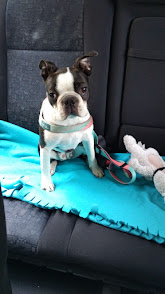

In [ ]:
img

In [ ]:
is_cat,_,probs = learn.predict(img)

In [ ]:
print(f"Czy to jest kot? {is_cat}.")
print(f"Prawdopodobieństwo, że to jest kot: {probs[1].item():.6f}")

Czy to jest kot? False.
Prawdopodobieństwo, że to jest kot: 0.000055


### Recenzje filmów

In [4]:
from fastai.text.all import *

In [6]:
dls = TextDataLoaders.from_folder(untar_data(URLs.IMDB), valid='test')

In [7]:
learn = text_classifier_learner(dls, AWD_LSTM, drop_mult=0.5, metrics=accuracy)
learn.fine_tune(4, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,0.469447,0.434506,0.810280,03:35


epoch,train_loss,valid_loss,accuracy,time
0,0.296363,0.241664,0.901680,07:21
1,0.243695,0.207721,0.919480,07:17
2,0.182788,0.190701,0.927000,07:17
3,0.149016,0.187103,0.930680,07:17


In [8]:
learn.predict('This movie was terrible')

('neg', TensorText(0), TensorText([0.9886, 0.0114]))

In [9]:
doc(learn.predict)

,Type,Default
item,,
rm_type_tfms,NoneType,``
with_input,bool,False


### Trenowanie modelu na danych tabelarycznych

In [10]:
from fastai.tabular.all import *

In [11]:
path = untar_data(URLs.ADULT_SAMPLE)

In [12]:
dls = TabularDataLoaders.from_csv(path/'adult.csv', path=path, y_names='salary',
                                  cat_names=['workclass','education',
                                             'marital-status','occupation',
                                             'relationship','race'],
                                  cont_names=['age','fnlwgt','education-num'],
                                  procs=[Categorify, FillMissing, Normalize])

In [13]:
learn = tabular_learner(dls, metrics=accuracy)

In [15]:
learn.fit_one_cycle(3)

epoch,train_loss,valid_loss,accuracy,time
0,0.374053,0.372600,0.828471,00:07
1,0.371670,0.362348,0.833999,00:04
2,0.350932,0.359070,0.838145,00:03


### System rekomendacyjny
Polecanie filmów na podstawie historii

In [16]:
from fastai.collab import *

In [17]:
path = untar_data(URLs.ML_SAMPLE)
dls = CollabDataLoaders.from_csv(path/'ratings.csv')

In [19]:
learn = collab_learner(dls, y_range=(0.5, 5.5))

In [20]:
learn.fine_tune(10)

epoch,train_loss,valid_loss,time
0,1.510421,1.409248,00:00


epoch,train_loss,valid_loss,time
0,1.378706,1.353837,00:00
1,1.283051,1.182615,00:00
2,1.051507,0.870182,00:00
3,0.827181,0.705093,00:00
4,0.702141,0.661779,00:00
5,0.646693,0.647653,00:00
6,0.621587,0.642445,00:00
7,0.605313,0.639461,00:00
8,0.602502,0.638560,00:00
9,0.606968,0.638429,00:00


In [21]:
learn.show_results()

,userId,movieId,rating,rating_pred
0,79.0,83.0,4.5,4.650622
1,49.0,77.0,5.0,4.435779
2,64.0,51.0,4.0,4.211000
3,98.0,7.0,5.0,4.833302
4,1.0,45.0,4.0,3.840652
5,86.0,48.0,3.0,3.797843
6,8.0,84.0,4.5,4.272635
7,93.0,71.0,3.0,4.155020
8,35.0,16.0,4.0,3.304728


### Segmentacja obrazów

In [22]:
path = untar_data(URLs.CAMVID_TINY)

In [23]:
dls = SegmentationDataLoaders.from_label_func(
    path, bs=8, fnames=get_image_files(path/'images'),
    label_func=lambda x: path/'labels'/f'{x.stem}_P{x.suffix}',
    codes=np.loadtxt(path/'codes.txt', dtype=str)
)

/usr/local/lib/python3.7/dist-packages/torch/_tensor.py:1051: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  ret = func(*args, **kwargs)


In [24]:
learn = unet_learner(dls, resnet34)

/usr/local/lib/python3.7/dist-packages/torch/_tensor.py:1051: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  ret = func(*args, **kwargs)
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

In [25]:
learn.fine_tune(8)

epoch,train_loss,valid_loss,time
0,2.791352,2.475053,00:03


/usr/local/lib/python3.7/dist-packages/torch/_tensor.py:1051: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  ret = func(*args, **kwargs)


epoch,train_loss,valid_loss,time
0,1.696525,1.439192,00:04
1,1.557295,1.486338,00:03
2,1.457017,1.215241,00:03
3,1.319104,1.018589,00:03
4,1.202802,0.895615,00:03
5,1.092066,0.799719,00:04
6,0.999271,0.787740,00:03
7,0.926988,0.768732,00:03


/usr/local/lib/python3.7/dist-packages/torch/_tensor.py:1051: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  ret = func(*args, **kwargs)


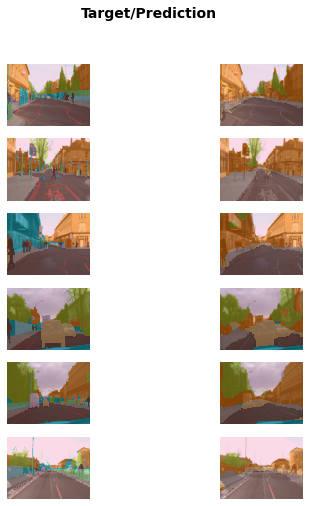

In [26]:
learn.show_results(max_n=6, figsize=(7,8))